In [ ]:
from __future__ import division
from neuron import h
from neuron.units import ms,mV
import matplotlib.pyplot as plt
#file missing
h.load_file('stdrun.hoc')
#
import math
import numpy as np
import random

['sunny' 'overcast' 'rainy' 'hot' 'mild' 'cool' 'high' 'normal' 'weak'
 'strong']
Encoded values are: [8 5 6 2 3 0 1 4 9 7]
180.0
60.0
40.0
200.0
120.0
60.0
40.0
200.0
140.0
80.0
40.0
200.0
140.0
20.0
100.0
200.0
120.0
20.0
100.0
160.0
180.0
20.0
100.0
200.0
140.0
80.0
100.0
200.0
180.0
80.0
100.0
200.0
120.0
80.0
40.0
160.0
120.0
60.0
100.0
200.0
60.0
4


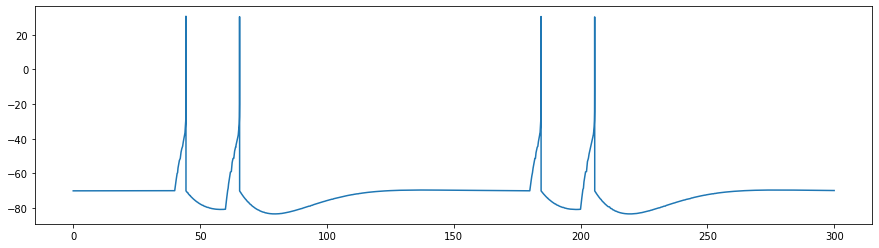

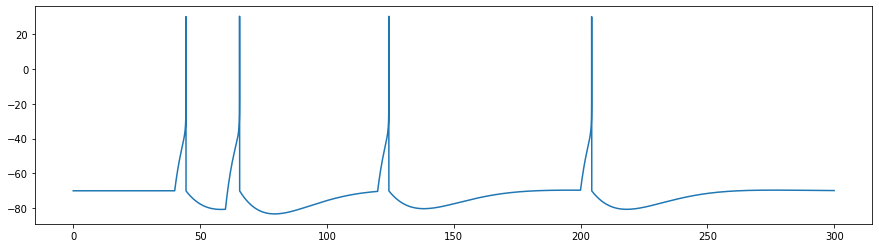

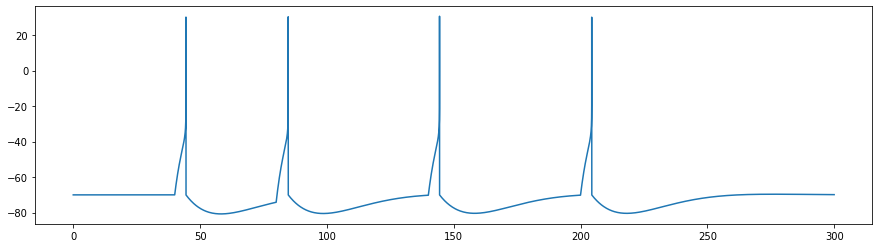

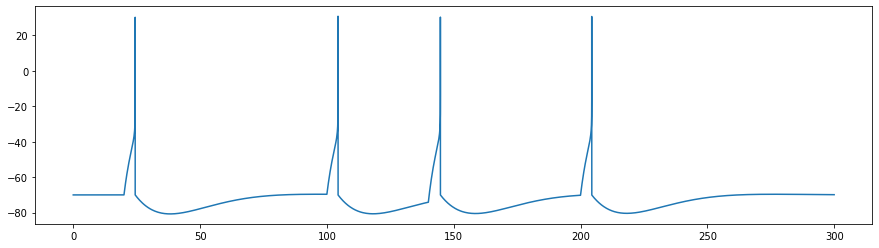

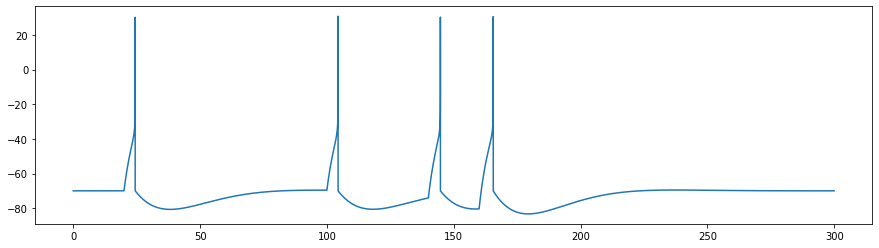

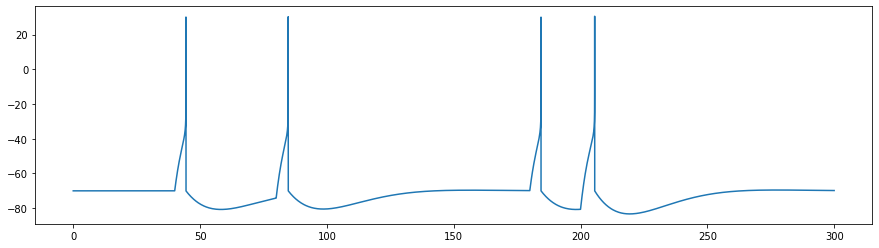

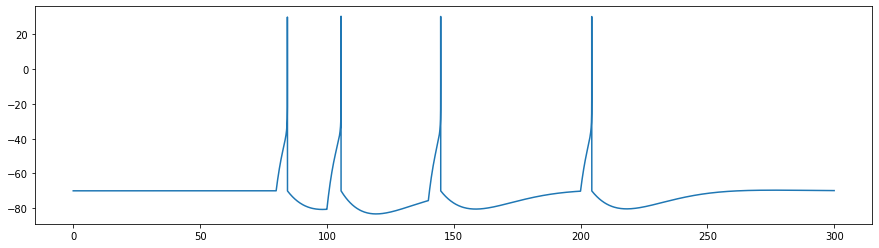

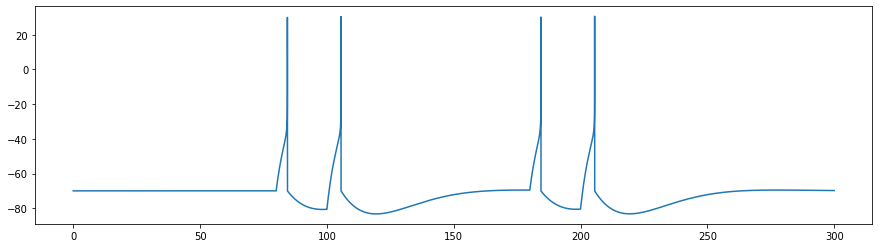

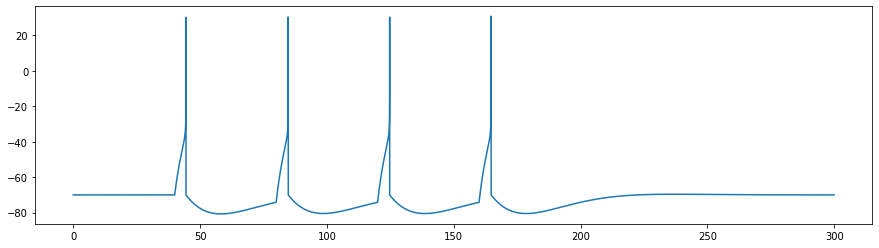

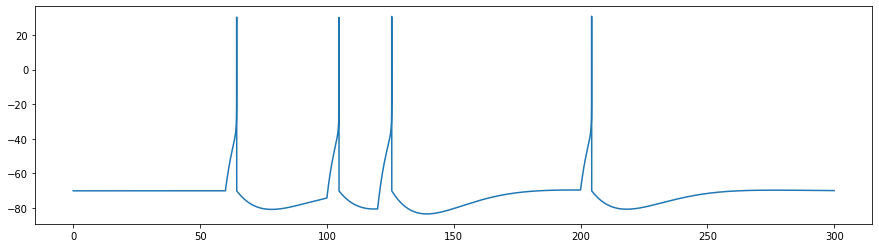

In [2]:
#NEURON MODELS OK
class padex:
    def __init__(self):
        self.soma=h.Section(name="soma",cell=self)
        self.padex=h.PyramidalNeuron(self.soma(0.5))
class bkadex:
    def __init__(self):
        self.soma=h.Section(name="soma",cell=self)
        self bkadex=h.BASKET(self.soma(0.5))
class nbkadex:
    def __init__(self):
        self.soma=h.Section(name="soma",cell=self)
        self nbkadex=h.NONBASKET(self.soma(0.5))
class sadex:
    def __init__(self):
        self.soma=h.Section(name="soma",cell=self)
        self sadex=h.SpinySkellateNeuron(self.soma(0.5))

#padex copies       
npadex=10
padexcells=list(range(npadex))
for i in range(npadex):
    padexcells[i] = padex()
    mf_padex=list(range(npadex))

#bkadex copies
nobkadex=10 
bkadexcells=list(range(nobkadex))
for i in range(nbkadex):
    bkadexcells[i] = bkadex()
    mf_bkadex=list(range(nobkadex))

#nbkadex copies
nnbkadex=10 
nbkadexcells=list(range(nnbkadex))
for i in range(nnbkadex):
    nbkadexcells[i] = nbkadex()
    mf_nbkadex=list(range(nnbkadex))

#sadex copies
nsadex=10 
sadexcells=list(range(nsadex))
for i in range(nsadex):
    sadexcells[i] = sadex()
    mf_sadex=list(range(nsadex))    

In [ ]:
#DATA ENCODING (ONEHOT) OK

In [ ]:
#resizing to 200ms OK
timemat=np.arange(0,300,0.025)
timematx=timemat.reshape(-1,12000)
timematxx=np.zeros(120000).reshape(10,12000)
for i in range(timematxx.shape[0]):
    for j in range(timematxx.shape[1]):
        timematxx[i][j]=timematx[0][j]# contain 10*8000 elements 0 to 200 with 0.025 interval     
        #print(timematxx[i][j])
#converting to binary array of inputs OK
c=0
ipmat.shape
for i in range(ipmat.shape[0]):
    for j in range(ipmat.shape[1]):
        for k in range(timematxx.shape[1]):
            if(timematxx[i][k]==ipmat[i][j]):
                timematxx[i][k]=1 #contains binary numbers with spike as 1
               
    
timematxx[timematxx!=1]=0
for i in range(npadex):
    timematxx[i][40]=0

for i in range(12000):
    if(timematxx[0][i]==1):
         c=c+1
            
print(c)  

#VECSTIM OK
vs=list(range(npadex))
for i in range(npadex):
    vs[i]=h.VecStim()
    
vsvec=h.Vector()
v=h.Vector(4)

nc=[]
# for i,vecs in enumerate(vs):
#     print(vecs)
#     vsvec.clear()
    
#     for j in range(ipmat.shape[1]):
#         v[j]=ipmat[i][j]
#         vsvec.append(v[j])
#         print(vsvec[j])
#     vsvec.sort()
#     vecs.play(vsvec)
#     print(padexcells[i])
#     nc.append(h.NetCon(vecs,padexcells[i].padex,0,0,25))

vecstim1=h.VecStim()
v1=h.Vector()
v1.append(40,60,180,200)
vecstim1.play(v1)
nc.append(h.NetCon(vecstim1,padexcells[0].padex,0,0,25))


vecstim3=h.VecStim()
v3=h.Vector()
v3.append(40,60,120,200)
vecstim3.play(v3)
nc.append(h.NetCon(vecstim3,padexcells[1].padex,0,0,25))

vecstim4=h.VecStim()
v4=h.Vector()
v4.append(40,80,140,200)
vecstim4.play(v4)
nc.append(h.NetCon(vecstim4,padexcells[2].padex,0,0,25))

vecstim5=h.VecStim()
v5=h.Vector()
v5.append(20,100,140,200)
vecstim5.play(v5)
nc.append(h.NetCon(vecstim5,padexcells[3].padex,0,0,25))

vecstim6=h.VecStim()
v6=h.Vector()
v6.append(20,100,140,160)
vecstim6.play(v6)
nc.append(h.NetCon(vecstim6,padexcells[4].padex,0,0,25))



vecstim8=h.VecStim()
v8=h.Vector()
v8.append(40,80,180,200)
vecstim8.play(v8)
nc.append(h.NetCon(vecstim8,padexcells[5].padex,0,0,25))


vecstim10=h.VecStim()
v10=h.Vector()
v10.append(80,100,140,200)
vecstim10.play(v10)
nc.append(h.NetCon(vecstim10,padexcells[6].padex,0,0,25))

vecstim11=h.VecStim()
v11=h.Vector()
v11.append(80,100,180,200)
vecstim11.play(v11)
nc.append(h.NetCon(vecstim11,padexcells[7].padex,0,0,25))

vecstim12=h.VecStim()
v12=h.Vector()
v12.append(40,80,120,160)
vecstim12.play(v12)
nc.append(h.NetCon(vecstim12,padexcells[8].padex,0,0,25))

vecstim13=h.VecStim()
v13=h.Vector()
v13.append(60,100,120,200)
vecstim13.play(v13)
nc.append(h.NetCon(vecstim13,padexcells[9].padex,0,0,25))

#RECORDING, RUN CONTROL and PLOTTING OK

vvec = list(range(npadex))
tvec = list(range(npadex))
ivec = list(range(npadex))



for i in range(npadex):
    vvec[i] = h.Vector()
    tvec[i] = h.Vector()
    ivec[i] = h.Vector()

for i in range(npadex):
    vvec[i].record(padexcells[i].padex._ref_vv)
    tvec[i].record(h._ref_t)
    h.tstop=300
    dt=0.025
    cvode=h.CVode()
    cvode.atol(0.001)
    cvode.use_daspk(1)
    h.cvode_active(1)
    h.run()
    plt.figure(figsize=(15,4))
    plt.plot(tvec[i],vvec[i])
    plt.show()

In [3]:
#weight matrix padex
dt=0.025
tstop=300
N_t = int(round(float(tstop)/dt))

np.random.seed(1)
n=npadex
wt_padex=np.zeros(120000).reshape(10,12000)
#wt_padex=np.random.uniform(low=5000, high=6000, size=(n,12000))
for i in range(npadex):
    rn=random.randint(50,100)
    for j in range(N_t):
        wt_padex[i][j]=rn
print(wt_padex)

#weight matrix bkadex
np.random.seed(1)
wt_bkadex=np.zeros(120000).reshape(10,12000)
for i in range(nobkadex):
    rn=random.randint(50,100)
    for j in range(N_t):
        wt_bkadex[i][j]=rn
print(wt_bkadex)

#weight matrix nbkadex
np.random.seed(1)
wt_nbkadex=np.zeros(120000).reshape(10,12000)
for i in range(nnbkadex):
    rn=random.randint(50,100)
    for j in range(N_t):
        wt_nbkadex[i][j]=rn
print(wt_nbkadex)

#weight matrix sadex
np.random.seed(1)
wt_sadex=np.zeros(120000).reshape(10,12000)
for i in range(nsadex):
    rn=random.randint(50,100)
    for j in range(N_t):
        wt_sadex[i][j]=rn
print(wt_sadex)

[[5417.0220047  5720.32449344 5000.11437482 ... 5323.98041627
  5326.59761251 5686.26652808]
 [5042.98321323 5580.4058299  5130.22933703 ... 5447.20819178
  5453.40834104 5566.16460129]
 [5376.44632386 5161.09943732 5227.29793964 ... 5489.76015455
  5403.21229869 5558.91605342]
 ...
 [5908.08828276 5432.06713502 5630.01415149 ... 5420.19940194
  5335.69211147 5845.61182684]
 [5146.79049746 5576.86170562 5355.36212094 ... 5298.29137985
  5708.58276269 5217.04267627]
 [5495.97457199 5775.25799412 5514.9808261  ... 5103.67160241
  5619.44743282 5810.03435038]]
[[75. 75. 75. ... 75. 75. 75.]
 [97. 97. 97. ... 97. 97. 97.]
 [55. 55. 55. ... 55. 55. 55.]
 ...
 [81. 81. 81. ... 81. 81. 81.]
 [85. 85. 85. ... 85. 85. 85.]
 [63. 63. 63. ... 63. 63. 63.]]


In [4]:
Vpadex=np.zeros(N_t+1,dtype=np.float128)
wpadex=np.zeros(N_t+1,dtype=np.float128)
time_range=np.arange(0, tstop, dt)
bkadex_input=np.zeros(120000).reshape(10,12000)
bkadexdot=np.zeros(120000).reshape(10,12000)
dotmat=np.zeros(12000)
V=np.zeros(N_t+1,dtype=np.float128)
w=np.zeros(N_t+1,dtype=np.float128)
bkadex_out=np.zeros(120010).reshape(10,12001)
annip=h.Vector(4)
wt_ann=np.zeros(len(annip))
wt_ann=np.random.uniform(low=5000, high=6000, size=(len(annip)))
dotann=np.zeros(len(annip))

In [5]:
iterations=5
j=0
#for it in range(iterations):
    
    print("\nNumber of iterations:",it)
    # mffpadex
    fpadex[0]=-70
    fpadex[0]=fpadex[0]fpadexells[0]fpadex.el
    j=0
    while j<10:
        for i in range(0,N_t):
            fpadex[0]=-70
            fpadex[0]=V[0]fpadexells[j]fpadex.el
            if timematxx[j][i]==1:
                wtmfpadex=wt_mfpadex[j][i].item()
            fpadexells[j]fpadex.gsynfpadexells[j]fpadex.gsyn+wtmfpadex
        
        fpadexells[j]fpadex.Isynfpadexells[j]fpadex.gsyn*(fpadex[i]-0)
            fpadex[i+1]=fpadex[i]+dt*(fpadexells[j]fpadex.gl*fpadexells[j]fpadex.el-fpadex[i])fpadexells[j]fpadex.glfpadexells[j]fpadex.delT*np.exp((fpadex[i]fpadexells[j]fpadex.Vt)fpadexells[j]fpadex.delT)fpadexells[j]fpadex.Isyn-fpadex[i])fpadexells[j]fpadex.C)
            fpadex[i+1]=fpadex[i]+dt*(fpadexells[j]fpadex.a*(fpadex[i+1]fpadexells[j]fpadex.el)-fpadex[i])fpadexells[j]fpadex.tw)
        fpadexells[j]fpadex.gsyn=-fpadexells[j]fpadex.gsynfpadexells[j]fpadex.tau)
            if(fpadex[i+1]>-20): #change here
                flag=0
            if((fpadex[i+1]>-40)and(flag==0)):
                bkadex_input[j][i]=1
                fpadex[i+1]=30
                fpadex[i+1]fpadexells[j]fpadex.Vr
                fpadex[i+1]=fpadex[i+1]fpadexells[j]fpadex.b
        j=j+1
        k=k+1
    countbkadex=0 
    for i in range(fpadex):
        for ii in range(12000):
            if bkadex_input[0][ii]==1:
                countbkadex=countbkadex+1
    print("number ofbkadexinput spiking",countbkadex)
#####################################################################################################
    fpadex-bkadex
    for k in range(bkadex_input.shape[0]):
        for kk in range(bkadex_input.shape[1]):
            if bkadex_input[k][kk]==1:
                bkadexdot[k][kk]=bkadex_input[k][kk]*wt_bkadex[k][kk] #matrix multiplication

    for m in range(bkadexdot.shape[1]):
        for mm in range(bkadexdot.shape[0]):
            dotmat[m]+=bkadexdot[mm][m]

    #bkadex euler solve
    V[0]=-70
    w[0]=V[0]-bkadexells[0].bkadex.el
    t=np.arange(0, tstop, dt)
    j=0
    
    for i in range(N_t):
        if(dotmat[i]>0):
            wtbkadex=dotmat[i]
            bkadexells[0].bkadex.gsyn +=wtbkadex
        bkadexells[0].bkadex.Isyn=bkadexells[0].bkadex.gsyn*(V[i]-0) 
        V[i+1]=V[i]+dt*((bkadexells[0].bkadex.gl*(bkadexells[0].bkadex.el-V[i])+bkadexells[0].bkadex.gl*bkadexells[0].bkadex.delT*np.exp((V[i]-bkadexells[0].bkadex.Vt)/bkadexells[0].bkadex.delT)-bkadexells[0].bkadex.Isyn-w[i])/bkadexells[0].bkadex.C)
        w[i+1]=w[i]+dt*((bkadexells[0].bkadex.a*(V[i+1]-bkadexells[0].bkadex.el)-w[i])/bkadexells[0].bkadex.tw)
        bkadexells[0].bkadex.gsyn=-(bkadexells[0].bkadex.gsyn/bkadexells[0].bkadex.taucal)
        if(V[i+1]>0):
            flag=0
        if((V[i+1]>-40)and(flag==0)):
            bkadex_out[j][i]=1
            V[i+1]=30
            V[i+1]=bkadexells[j].bkadex.Vr
            w[i+1]=w[i+1]+bkadexells[j].bkadex.b
    countbkadex=0
    for i in range(bkadex_out.shape[0]):
        for j in range(bkadex_out.shape[1]):
            if bkadex_out[i][j]==1:
                countbkadex=countbkadex+1
    print("spike number of bkadex:",countbkadex)      

    #decoding bkadex output
    t_win=4000
    iann=0
    temp=0
    for i in range(12000):
        if(bkadex_out[0][i]>0):
            temp+=1
        if(i==t_win):
            annip[iann]=temp
            t_win=t_win+4000
            i=t_win
            temp==0
            iann=iann+1
    totann=0
    for i in range(len(annip)):
        dotann[i]=annip[i]*wt_ann[i]
        totann=totann+dotann[i]
    print("total ann output:",totann)
    ann_op=abs(totann)
    print("ann output:",ann_op)

    #backpropogation
    exp_op=0
    lr=0.9
    lrbkadex=1.26
    lrnn=0.01
    sgm=1 / (1 + np.exp(-ann_op))#activation function
    print("sigmoid op:",sgm)

    error=exp_op-sgm #loss function
    error=(error)**2
    print("error calculation:",error)
    enn=(exp_op-sgm)*sgm*(1-sgm)

    upd_wtmfpadex=np.dot(wt_mfpadex, error*lr)
    upd_wtbkadex=np.dot(wt_bkadex,error*lrbkadex)
    upd_wtnn=np.dot(wt_ann,enn*lrnn)
    wt_mfpadex+=upd_wtmfpadex
    wt_bkadex-=upd_wtbkadex
    wt_ann-=upd_wtnn
    #print("updated mfpadex weight:",upd_wtbkadex)


Number of iterations: 0
number ofpcinput spiking 40
spike number of pc: 10
total ann output: 84288.35495793445
ann output: 84288.35495793445
sigmoid op: 1.0
error calculation: 1.0

Number of iterations: 1
number ofpcinput spiking 40
spike number of pc: 10
total ann output: 84288.35495793445
ann output: 84288.35495793445
sigmoid op: 1.0
error calculation: 1.0

Number of iterations: 2
number ofpcinput spiking 40
spike number of pc: 10
total ann output: 84288.35495793445
ann output: 84288.35495793445
sigmoid op: 1.0
error calculation: 1.0

Number of iterations: 3
number ofpcinput spiking 40
spike number of pc: 10
total ann output: 84288.35495793445
ann output: 84288.35495793445
sigmoid op: 1.0
error calculation: 1.0

Number of iterations: 4
number ofpcinput spiking 40
spike number of pc: 10
total ann output: 84288.35495793445
ann output: 84288.35495793445
sigmoid op: 1.0
error calculation: 1.0


In [ ]:
sgm=1 / (1 + np.exp(-162249))
print(sgm)